In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util.dtype import img_as_float
img = data.camera()
img = img_as_float(img)
height = img.shape[0]
width = img.shape[1]

In [5]:
def BLPF(D0,n): 
    #1.位移
    fimg = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            fimg[i,j]=img[i,j]*((-1)**(i+j))
    #2.dft
    fimg = np.fft.fft2(fimg)
    #3.滤波
    #巴特沃斯低通滤波
    mask = np.ones_like(img)
    hh = mask.shape[0]
    ww = mask.shape[1]
    ch = int(hh/2.0)#取整
    cw = int(ww/2.0)

    for i in range(hh):
        for j in range(ww):
            dd = np.sqrt((i-ch)**2+(j-cw)**2)
            tmp = 1+((dd/D0)**(2*n))
            mask[i,j]=1/tmp
    fimg = fimg * mask

    #4.逆变换
    iimg=np.fft.ifft2(fimg)

    #5.取实部
    iimg=np.real(iimg)

    #6.恢复
    for i in range(height):
        for j in range(width):
            iimg[i,j]=iimg[i,j]*((-1)**(i+j))
    iimg=np.abs(iimg)
    return iimg

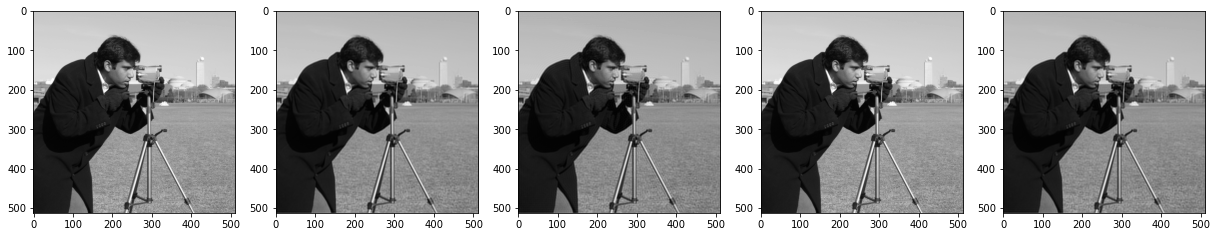

In [9]:
fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(1,5,1)
org.imshow(img,cmap='gray')

test1_img = fig.add_subplot(1,5,2)
test1_img.imshow(BLPF(100,5),cmap='gray')

test2_img = fig.add_subplot(1,5,3)
test2_img.imshow(BLPF(100,50),cmap='gray')

test3_img = fig.add_subplot(1,5,4)
test3_img.imshow(BLPF(1000,5),cmap='gray')

test4_img = fig.add_subplot(1,5,5)
test4_img.imshow(BLPF(100,9),cmap='gray')

plt.show()